In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# read data set into dataframe
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In [5]:
#Check for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
#Check for data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
# Unnamed column is not contributing anything and will be dropped
df.drop(columns=['Unnamed: 0'], inplace=True)

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

       Date  AveragePrice  Total Volume     4046       4225    4770  \
0        51          1.33      64236.62  1036.74   54454.85   48.16   
1        50          1.35      54876.98   674.28   44638.81   58.33   
2        49          0.93     118220.22   794.70  109149.67  130.50   
3        48          1.08      78992.15  1132.00   71976.41   72.58   
4        47          1.28      51039.60   941.48   43838.39   75.78   
...     ...           ...           ...      ...        ...     ...   
18244   161          1.63      17074.83  2046.96    1529.20    0.00   
18245   160          1.71      13888.04  1191.70    3431.50    0.00   
18246   159          1.87      13766.76  1191.92    2452.79  727.94   
18247   158          1.93      16205.22  1527.63    2981.04  727.01   
18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015    

No null value so its safe to proceed

In [13]:
scaler = StandardScaler()

In [14]:
x = df.drop('AveragePrice', axis=1)
x_scaled = scaler.fit_transform(x)

In [15]:
pca = PCA()
pca.fit_transform(x_scaled)

array([[-6.66071621e-01,  1.32363876e+00, -1.94183492e+00, ...,
        -4.57028967e-02,  6.51763593e-07,  1.28738279e-09],
       [-6.69677995e-01,  1.33753322e+00, -1.94151718e+00, ...,
        -4.91843154e-02,  6.58895057e-07,  1.25525190e-09],
       [-6.44929206e-01,  1.35509255e+00, -1.94267518e+00, ...,
        -1.46301678e-02,  7.16331203e-07,  1.09779531e-09],
       ...,
       [-5.45761914e-01, -2.48244319e+00,  1.93784301e+00, ...,
         5.04449314e-02, -2.22635982e-06,  4.81015246e-10],
       [-5.44193217e-01, -2.46806946e+00,  1.93801579e+00, ...,
         5.11742075e-02, -2.21561902e-06,  4.30678846e-10],
       [-5.44821918e-01, -2.45402603e+00,  1.93854298e+00, ...,
         5.30842092e-02, -2.20113036e-06,  3.83968333e-10]])

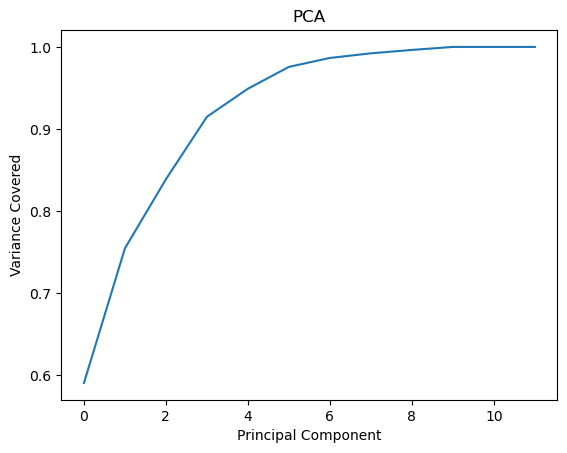

In [16]:
#Lets plot screen plot to check the best features
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [17]:
pca = PCA(n_components=8)
new_comp = pca.fit_transform(x_scaled)
ci_comp = pd.DataFrame(new_comp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

ci_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.666072,1.323639,-1.941835,0.002178,0.142414,-0.291880,-0.010405,-0.002908
1,-0.669678,1.337533,-1.941517,0.002189,0.147213,-0.293326,-0.008127,-0.007511
2,-0.644929,1.355093,-1.942675,0.004722,0.126862,-0.289907,-0.020144,0.021267
3,-0.662589,1.367782,-1.941876,0.003350,0.139979,-0.291673,-0.011970,0.001659
4,-0.673936,1.380816,-1.941207,0.002642,0.150692,-0.293964,-0.005797,-0.011965
...,...,...,...,...,...,...,...,...
18244,-0.543121,-2.511949,1.938341,-0.171424,-0.227417,0.381996,-0.013542,0.015268
18245,-0.547225,-2.497319,1.938255,-0.171564,-0.227547,0.383680,-0.012320,0.013710
18246,-0.545762,-2.482443,1.937843,-0.170830,-0.228674,0.387423,-0.008938,0.012091
18247,-0.544193,-2.468069,1.938016,-0.170352,-0.227197,0.385987,-0.009313,0.012409


In [19]:
y = df['AveragePrice']

In [27]:
from sklearn.svm import SVR

maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(ci_comp,y ,test_size =0.30, random_state=i)
    svr = SVR()
    svr.fit(x_train, y_train)
    pred = svr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.5542164830893707  at random state :  113


In [28]:
x_train, x_test, y_train, y_test = train_test_split(ci_comp,y, test_size=0.30, random_state=113)

svr = SVR()
svr.fit(x_train, y_train)
pred_SVR = svr.predict(x_test)
pred_train = svr.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_SVR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_SVR))
print('mean squared error : ',mean_squared_error(y_test, pred_SVR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_SVR)))

R2 Score :  0.5542164830893707
R2 Score on training data :  52.91237572996136
mean absolute error :  0.19731071536029987
mean squared error :  0.07285669226837135
root mean squared error :  0.2699197885824071
